In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [2]:
cars = pd.read_csv(r"C:\Users\moran\Desktop\Datasets\cars.csv")

In [3]:
cars = cars.loc[cars.MPG > 0, ]

### Separating the Predictor and the Target

In [4]:
#Predictors
X = cars[['Cylinders', 'Displacement', 'Horsepower', 'Weight']]

In [5]:
X.head()

,Cylinders,Displacement,Horsepower,Weight
0,8,307.0,130,3504
1,8,350.0,165,3693
2,8,318.0,150,3436
3,8,304.0,150,3433
4,8,302.0,140,3449


In [6]:
#Target
y = cars.MPG

### Standardized (Scaled) Predictors

Standardization: Bring the variables into a same scale where the mean of all variables are equal to 0 and the standard deviation is 1

(X - mean(X))/Std(X)

In [7]:
def standardize(x):
    return((x - np.mean(x))/np.std(x))

In [8]:
standardize(cars.Weight).var()

1.0025188916876568

In [9]:
#Apply function help us to apply a function to all the columns in the data
#here x represents a column (array)
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [10]:
X_scaled.head()

,Cylinders,Displacement,Horsepower,Weight
0,1.498191,1.090604,0.673950,0.630870
1,1.498191,1.503514,1.544187,0.854333
2,1.498191,1.196232,1.171228,0.550470
3,1.498191,1.061796,1.171228,0.546923
4,1.498191,1.042591,0.922589,0.565841


In [11]:
X_scaled.mean()

Cylinders      -7.671139e-16
Displacement   -1.205066e-16
Horsepower     -7.420084e-17
Weight         -1.394753e-17
dtype: float64

In [12]:
X.mean()

Cylinders          5.454774
Displacement     193.425879
Horsepower       102.894472
Weight          2970.424623
dtype: float64

In [13]:
X_scaled.var()

Cylinders       1.002519
Displacement    1.002519
Horsepower      1.002519
Weight          1.002519
dtype: float64

### Train-Test Split

In [14]:
#Function test-train split
from sklearn.model_selection import train_test_split

In [15]:
(X_train, X_test, y_train, y_test) = train_test_split(X_scaled, y, test_size = 0.3)

In [16]:
len(X_train)

278

### Fitting a KNN Regressor

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
# Step-1: instantiate learning model (k = 3)
knn = KNeighborsRegressor(n_neighbors=3, metric='euclidean') # 3-NN using euclidean distance

# Step-2: fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

### Prediction

In [19]:
#Make prediction on the test data
predicted_values = knn.predict(X_test)

In [20]:
#predicted values of all the obs in the test data based on 3-NN model
predicted_values

array([31.73333333, 32.83333333, 15.66666667, 16.06666667, 30.6       ,
       37.4       , 23.53333333, 14.33333333, 14.3       , 19.66666667,
       20.33333333, 31.4       , 23.66666667, 14.8       , 21.16666667,
       27.        , 20.56666667, 38.6       , 23.33333333, 18.76666667,
       16.83333333, 25.73333333, 24.33333333, 15.33333333, 30.93333333,
       24.76666667, 19.5       , 18.        , 26.16666667, 26.33333333,
       23.66666667, 14.83333333, 32.1       , 26.66666667, 29.96666667,
       15.33333333, 21.53333333, 25.16666667, 32.53333333, 32.7       ,
       34.9       , 25.33333333, 14.3       , 27.43333333, 20.56666667,
       26.66666667, 27.06666667, 14.5       , 16.83333333, 14.33333333,
       18.96666667, 26.66666667, 16.83333333, 31.1       , 19.66666667,
       14.8       , 15.66666667, 14.16666667, 13.33333333, 40.06666667,
       24.66666667, 19.33333333, 29.76666667, 15.66666667, 18.96666667,
       26.        , 24.66666667, 17.83333333, 35.73333333, 32.86

        For each observation in the test data:
            search k nearest neighbours from the training data
            predicted value = mean(y of the k nearest neighbours)

On average, the results of the predictions done by the model is (plus or minus) 3.18 off the actual value.

### Accuracy Checks

In [21]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test - predicted_values))

2.999722222222222

In [22]:
# MSE (Mean Squared Error)
np.mean((y_test - predicted_values)**2)

18.110212962962972

In [23]:
# RMSE (Root Mean Squared Error)
np.sqrt(np.mean((y_test - predicted_values)**2))

4.255609587704559

In [24]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - predicted_values)/y_test)*100

12.811996635601542

### Choosing best k

In [25]:
neighbour = np.arange(1,51)
mad = []

for k in neighbour:
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    predicted_values = knn.predict(X_test)
    mad.append(np.mean(np.abs(y_test - predicted_values)))


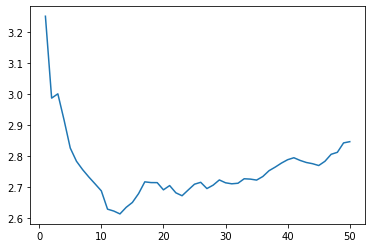

In [26]:
plt.plot(neighbour, np.array(mad))
plt.show()

In [27]:
np.min(np.array(mad))

2.6123076923076933

In [28]:
np.array(mad)

array([3.25      , 2.98583333, 2.99972222, 2.91541667, 2.82483333,
       2.78222222, 2.75488095, 2.73114583, 2.70907407, 2.68666667,
       2.62765152, 2.62159722, 2.61230769, 2.6335119 , 2.64927778,
       2.67786458, 2.71578431, 2.71337963, 2.71320175, 2.68995833,
       2.70376984, 2.68037879, 2.67094203, 2.68979167, 2.70816667,
       2.71426282, 2.69410494, 2.70508929, 2.72189655, 2.71269444,
       2.70946237, 2.71122396, 2.72570707, 2.72458333, 2.72145238,
       2.73298611, 2.75171171, 2.76337719, 2.77630342, 2.78720833,
       2.79353659, 2.78492063, 2.77823643, 2.77433712, 2.76842593,
       2.78206522, 2.80464539, 2.81102431, 2.84137755, 2.84536667])